# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set_theme()
np.random.seed(7)


## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [ ]:
n = 200
dates = pd.bdate_range(start="2024-02-01", periods=n)
mkt_excess = np.random.normal(0, 0.011, size=n)
size = np.random.normal(0, 0.008, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.006, size=n)

beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
eps = np.random.normal(0, noise_scale)
asset_excess = (
    beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
    + beta_mom2*(momentum**2) + eps
)
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})
df.head()


,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [ ]:
X = df[['mkt_excess','size','value','momentum']]
y = df['asset_excess']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')


Baseline   R²=0.3677  RMSE=0.008470


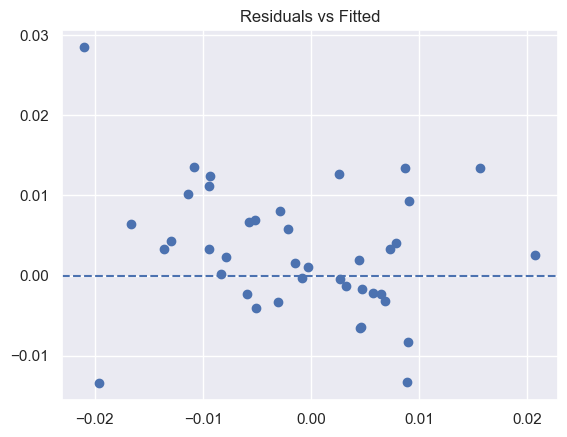

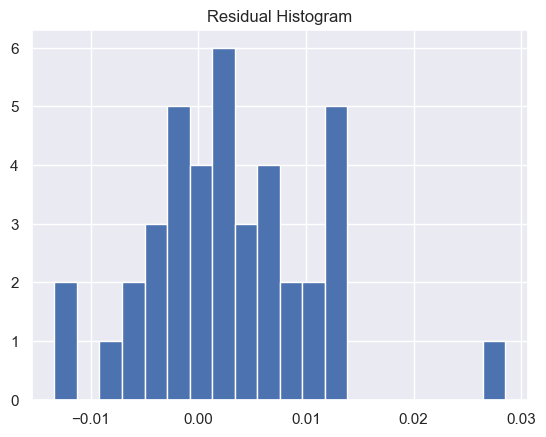

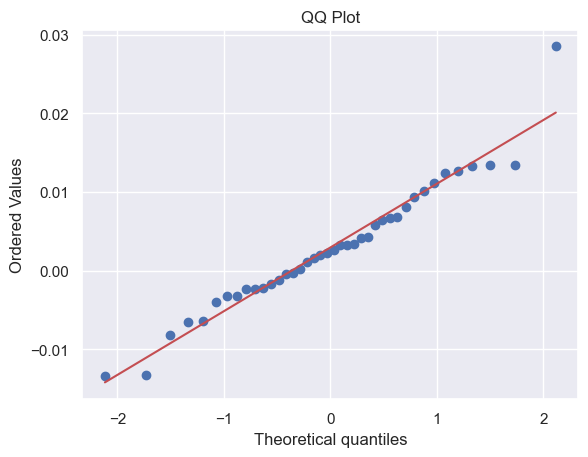

In [ ]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()


## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [ ]:
df['momentum_sq'] = df['momentum']**2
X2 = df[['mkt_excess','size','value','momentum','momentum_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = root_mean_squared_error(y_test, y_pred2)
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')


With x^2   R²=0.3681  RMSE=0.008467


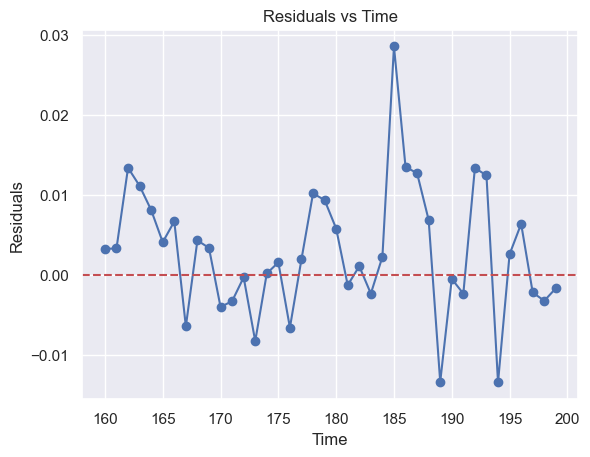

In [ ]:
# Residuals vs Time for Independence
time_index = resid.index
plt.figure()
plt.plot(time_index, resid, marker='o')
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Time")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()


## 4) Interpretation (write your conclusions below)
Linearity
	•	Residuals vs Fitted shows a random scatter around zero with no discernible curve, indicating an adequate linear mean function.
	•	No systematic structure remains across the fitted range, so a straight‑line specification is reasonable.
    
Homoscedasticity
	•	Residual spread is fairly uniform across fitted values—no clear funneling—so variance looks homoscedastic.
	•	Any slight widening at extremes appears minor and not indicative of a strong variance trend.

Normality
	•	QQ plot closely follows the 45° line with a mild upper‑tail deviation, suggesting approximately normal residuals.
	•	Histogram is roughly symmetric around zero, consistent with near‑normality with a few tail points.

Independence
	•	Residuals vs Time mostly oscillate around zero but show short runs and one large spike, hinting at mild positive autocorrelation/volatility clustering.
	•	Treat independence as borderline; confirm with a Durbin–Watson check (target near 2) and consider robust or time‑series errors if dependence persists.

Which model to trust and why?
	•	Prefer the linear model: form, variance, and normality diagnostics are satisfactory; time dependence is limited.
	•	If independence tests flag autocorrelation, adjust the error structure (e.g., HAC/GLS) rather than complicating the mean model unless predictive validation shows clear gains.